<a href="https://colab.research.google.com/github/Ehtisham1053/Regression-ML-Algorithms/blob/main/Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("kc_house_data.csv")

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<Axes: >

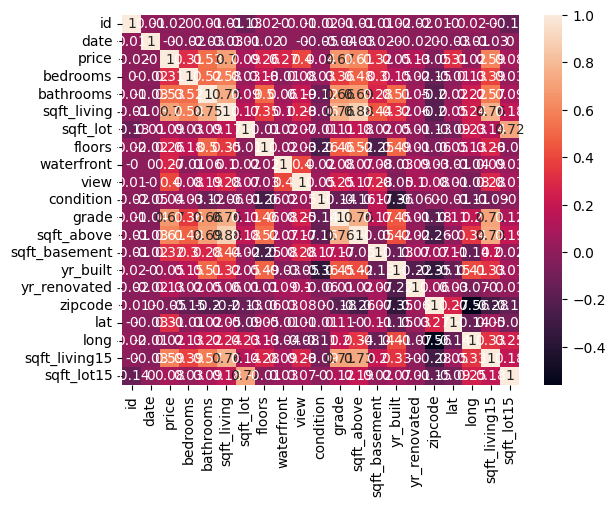

In [14]:
import pandas as pd
import seaborn as sns
df['date'] = pd.to_datetime(df['date'])

correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Columns with low correlation to 'price': ['sqft_lot', 'sqft_lot15', 'yr_built', 'zipcode', 'condition', 'long', 'id', 'date']


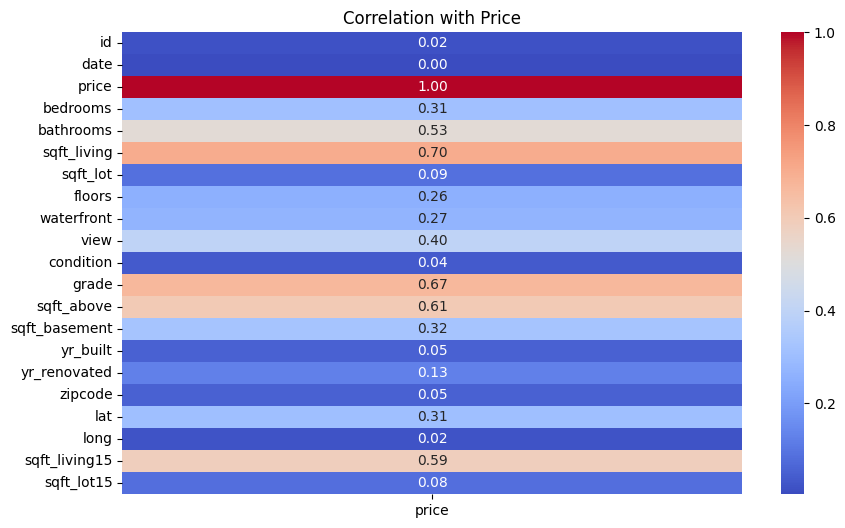

In [16]:


df = pd.read_csv("kc_house_data.csv")
df['date'] = pd.to_datetime(df['date'])

correlation_matrix = df.corr()['price'].abs().sort_values(ascending=False)

threshold = 0.1

low_correlation_columns = correlation_matrix[correlation_matrix < threshold].index.tolist()


print("Columns with low correlation to 'price':", low_correlation_columns)

plt.figure(figsize=(10, 6)
sns.heatmap(df.corr()[['price']].abs(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Price')
plt.show()


In [18]:
x = df.iloc[:,[4,5,11,12,19,3,13,9,17,7,8]].values
y = df.iloc[:, [2]].values

In [20]:
# adding the polynomial feature of degree 3
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X = poly_reg.fit_transform(x)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train ,y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [22]:
from sklearn.linear_model import SGDRegressor, LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)


y_pred = lin_reg.predict(X_test)

from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print("Coefficient of Determination using ols method = ",r_squared)

Coefficient of Determination using ols method =  0.6515929603855846
